In [806]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
set_config(display='diagram')
np.random.seed(42)

import statsmodels.api as sm
import os, json, re

# Loading Data:

In [807]:
#checking folder
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 '2000-2022 csv',
 '2000-2022 json',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_2000_2022_combined.csv.gz',
 'tmdb_results_combined.csv.gz']

In [808]:
#loading file in df
df = pd.read_csv(FOLDER+ file_list[6])
df

,Unnamed: 0,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,4.0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,1950.0,PG
1,11.0,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R
2,13.0,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.725,4101.0,G
3,16.0,tt0120753,0.0,NaN,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.915,254.0,R
4,17.0,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.107,5441.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66521,NaN,tt9863642,0.0,/61tkYBhLElKr4YLncl5n5NQnyBR.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",https://www.maverickentertainment.cc/movies/de...,1018644.0,en,...,0.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Trapped in a web of deception.,Deceitful Tendencies,0.0,0.000,0.0,NaN
66522,NaN,tt9883832,0.0,/zM3xzRdSshKz6zBZQG0NLyGs2gf.jpg,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",https://neonrated.com/films/bowie-moonage-dayd...,957457.0,en,...,0.0,135.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Bowie.,Moonage Daydream,0.0,0.000,0.0,PG-13
66523,NaN,tt9893158,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955.0,en,...,0.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Warm nights... Feels like death in the sand du...,Clowning,0.0,8.000,1.0,NaN
66524,NaN,tt9893160,0.0,/jX5XGqJUTzvpta2RjcX6pMZqxk5.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,606303.0,en,...,0.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Find what you love and let it kill you.,No Way Out,0.0,4.250,4.0,NaN


In [809]:
#dropping unnamed column
df = df.drop(columns='Unnamed: 0')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,1950.0,PG
1,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R
2,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.725,4101.0,G
3,tt0120753,0.0,NaN,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.915,254.0,R
4,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.107,5441.0,PG-13


In [810]:
#removing 0 for id's
df = df.loc[df['imdb_id']!='0']

In [811]:
#reseting index
df = df.reset_index(drop=True)

# Preprocessing:

In [812]:
#excluding these columns
drop_cols = ['backdrop_path', 'backdrop_path', 'original_title', 'overview',
            'poster_path', 'status', 'tagline', 'id', 'homepage', 'production_countries',
            'video', 'production_companies', 'spoken_languages', 'original_language']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.523,2000-09-29,12854953.0,99.0,In the Mood for Love,8.100,1950.0,PG
1,tt0120467,0.0,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",3.205,2002-04-26,14904.0,87.0,Vulgar,5.400,42.0,R
2,tt0120630,0.0,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",48.662,2000-06-21,224834564.0,84.0,Chicken Run,6.725,4101.0,G
3,tt0120753,0.0,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",8.136,2000-02-09,105983.0,122.0,The Million Dollar Hotel,5.915,254.0,R
4,tt0120755,0.0,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",37.711,2000-05-24,546388105.0,123.0,Mission: Impossible II,6.107,5441.0,PG-13


In [813]:
df_test = df.copy()
df_test

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.523,2000-09-29,12854953.0,99.0,In the Mood for Love,8.100,1950.0,PG
1,tt0120467,0.0,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",3.205,2002-04-26,14904.0,87.0,Vulgar,5.400,42.0,R
2,tt0120630,0.0,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",48.662,2000-06-21,224834564.0,84.0,Chicken Run,6.725,4101.0,G
3,tt0120753,0.0,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",8.136,2000-02-09,105983.0,122.0,The Million Dollar Hotel,5.915,254.0,R
4,tt0120755,0.0,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",37.711,2000-05-24,546388105.0,123.0,Mission: Impossible II,6.107,5441.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66500,tt9863642,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",4.046,2022-08-30,0.0,84.0,Deceitful Tendencies,0.000,0.0,NaN
66501,tt9883832,0.0,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",16.242,2022-09-15,0.0,135.0,Moonage Daydream,0.000,0.0,PG-13
66502,tt9893158,0.0,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",2.897,2022-03-13,0.0,96.0,Clowning,8.000,1.0,NaN
66503,tt9893160,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",9.493,2022-08-12,0.0,89.0,No Way Out,4.250,4.0,NaN


## Feature Engineering:
- Collection: convert to boolean
- Genres: get just name and OHE
- Cleaning Certification
- Converting release date to year, month, and day.

In [814]:
#belongs to collection
#removing nan in collections and seeing true or false
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    62577
True      3928
Name: belongs_to_collection, dtype: int64

In [815]:
#spreading string apart
test= df_test['genres'].str.split(r"\'|:|{|}", expand=True)
test

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,[,,id,,"18,",name,,,Drama,,...,None,None,None,None,None,None,None,None,None,None
1,[,,id,,"18,",name,,,Drama,,...,None,None,None,None,None,None,None,None,None,None
2,[,,id,,"16,",name,,,Animation,,...,None,None,None,None,None,None,None,None,None,None
3,[,,id,,"18,",name,,,Drama,,...,None,None,None,None,None,None,None,None,None,None
4,[,,id,,"12,",name,,,Adventure,,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66500,[,,id,,"53,",name,,,Thriller,,...,None,None,None,None,None,None,None,None,None,None
66501,[,,id,,"99,",name,,,Documentary,,...,None,None,None,None,None,None,None,None,None,None
66502,[,,id,,"80,",name,,,Crime,,...,None,None,None,None,None,None,None,None,None,None
66503,[,,id,,"53,",name,,,Thriller,,...,None,None,None,None,None,None,None,None,None,None


In [816]:
#making genre_list column
df_test['genre_list'] = test[8]
df_test['genre_list']

0              Drama
1              Drama
2          Animation
3              Drama
4          Adventure
            ...     
66500       Thriller
66501    Documentary
66502          Crime
66503       Thriller
66504         Comedy
Name: genre_list, Length: 66505, dtype: object

In [817]:
#exploding df with genre_list
df_explode = df_test.explode('genre_list')
df_explode

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genre_list
0,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.523,2000-09-29,12854953.0,99.0,In the Mood for Love,8.100,1950.0,PG,Drama
1,tt0120467,0.0,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",3.205,2002-04-26,14904.0,87.0,Vulgar,5.400,42.0,R,Drama
2,tt0120630,0.0,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",48.662,2000-06-21,224834564.0,84.0,Chicken Run,6.725,4101.0,G,Animation
3,tt0120753,0.0,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",8.136,2000-02-09,105983.0,122.0,The Million Dollar Hotel,5.915,254.0,R,Drama
4,tt0120755,0.0,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",37.711,2000-05-24,546388105.0,123.0,Mission: Impossible II,6.107,5441.0,PG-13,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66500,tt9863642,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",4.046,2022-08-30,0.0,84.0,Deceitful Tendencies,0.000,0.0,NaN,Thriller
66501,tt9883832,0.0,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",16.242,2022-09-15,0.0,135.0,Moonage Daydream,0.000,0.0,PG-13,Documentary
66502,tt9893158,0.0,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",2.897,2022-03-13,0.0,96.0,Clowning,8.000,1.0,NaN,Crime
66503,tt9893160,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",9.493,2022-08-12,0.0,89.0,No Way Out,4.250,4.0,NaN,Thriller


In [818]:
#unique_genres = df_explode['genre_list'].unique()
unique_genres = df_explode['genre_list'].dropna().unique()
unique_genres

array(['Drama', 'Animation', 'Adventure', 'Romance', 'Mystery', 'Family',
       'Horror', 'Thriller', 'Science Fiction', 'War', 'Fantasy',
       'Action', 'Comedy', 'Crime', 'History', 'Documentary', 'Music',
       'Western', 'TV Movie'], dtype=object)

In [819]:
#manual one-hot encode genres
for genre in unique_genres:
    df[f'Genre_{genre}'] = df['genres'].str.contains(genre, regex=False)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,...,Genre_War,Genre_Fantasy,Genre_Action,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie
0,tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.523,2000-09-29,12854953.0,99.0,In the Mood for Love,...,False,False,False,False,False,False,False,False,False,False
1,tt0120467,0.0,False,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",3.205,2002-04-26,14904.0,87.0,Vulgar,...,False,False,False,False,True,False,False,False,False,False
2,tt0120630,0.0,True,45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",48.662,2000-06-21,224834564.0,84.0,Chicken Run,...,False,False,False,True,False,False,False,False,False,False
3,tt0120753,0.0,False,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",8.136,2000-02-09,105983.0,122.0,The Million Dollar Hotel,...,False,False,False,False,False,False,False,False,False,False
4,tt0120755,0.0,True,125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",37.711,2000-05-24,546388105.0,123.0,Mission: Impossible II,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66500,tt9863642,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}]",4.046,2022-08-30,0.0,84.0,Deceitful Tendencies,...,False,False,False,False,False,False,False,False,False,False
66501,tt9883832,0.0,False,0.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",16.242,2022-09-15,0.0,135.0,Moonage Daydream,...,False,False,False,False,False,False,True,True,False,False
66502,tt9893158,0.0,False,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",2.897,2022-03-13,0.0,96.0,Clowning,...,False,False,False,False,True,False,False,False,False,False
66503,tt9893160,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",9.493,2022-08-12,0.0,89.0,No Way Out,...,False,False,False,False,True,False,False,False,False,False


In [820]:
df = df.drop(columns=['genres'])
df

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,...,Genre_War,Genre_Fantasy,Genre_Action,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie
0,tt0118694,0.0,False,150000.0,21.523,2000-09-29,12854953.0,99.0,In the Mood for Love,8.100,...,False,False,False,False,False,False,False,False,False,False
1,tt0120467,0.0,False,120000.0,3.205,2002-04-26,14904.0,87.0,Vulgar,5.400,...,False,False,False,False,True,False,False,False,False,False
2,tt0120630,0.0,True,45000000.0,48.662,2000-06-21,224834564.0,84.0,Chicken Run,6.725,...,False,False,False,True,False,False,False,False,False,False
3,tt0120753,0.0,False,8000000.0,8.136,2000-02-09,105983.0,122.0,The Million Dollar Hotel,5.915,...,False,False,False,False,False,False,False,False,False,False
4,tt0120755,0.0,True,125000000.0,37.711,2000-05-24,546388105.0,123.0,Mission: Impossible II,6.107,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66500,tt9863642,0.0,False,0.0,4.046,2022-08-30,0.0,84.0,Deceitful Tendencies,0.000,...,False,False,False,False,False,False,False,False,False,False
66501,tt9883832,0.0,False,0.0,16.242,2022-09-15,0.0,135.0,Moonage Daydream,0.000,...,False,False,False,False,False,False,True,True,False,False
66502,tt9893158,0.0,False,0.0,2.897,2022-03-13,0.0,96.0,Clowning,8.000,...,False,False,False,False,True,False,False,False,False,False
66503,tt9893160,0.0,False,0.0,9.493,2022-08-12,0.0,89.0,No Way Out,4.250,...,False,False,False,False,True,False,False,False,False,False


In [821]:
#Certification
# Checking Certification values counts
df['certification'].value_counts(dropna=False)

NaN                                50987
R                                   6148
NR                                  3727
PG-13                               3398
PG                                  1571
G                                    507
NC-17                                157
Unrated                                4
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
R                                      1
PG-13                                  1
10                                     1
Name: certification, dtype: int64

In [822]:
#fixing extra space on string certification
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna = False)

NaN                                50987
R                                   6149
NR                                  3727
PG-13                               3399
PG                                  1571
G                                    507
NC-17                                157
Unrated                                4
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
10                                     1
Name: certification, dtype: int64

In [823]:
#fixing certification errors
fix_cert = {'UR':'NR', 'Not Rated':'NR', 'Unrated':'NR', '10':np.nan, 
            'ScreamFest Horror Film Festival':'NR'}

df['certification'] = df['certification'].replace(fix_cert)
df['certification'].value_counts(dropna=False)

NaN      50988
R         6149
NR        3734
PG-13     3399
PG        1571
G          507
NC-17      157
Name: certification, dtype: int64

In [824]:
#Converting year to sep features
# split release date into 3 columns
new_cols = ['year', 'month', 'day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
#making float
df[new_cols] = df[new_cols].astype(float)

In [825]:
df = df.drop(columns=['release_date'])
df

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,...,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,year,month,day
0,tt0118694,0.0,False,150000.0,21.523,12854953.0,99.0,In the Mood for Love,8.100,1950.0,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
1,tt0120467,0.0,False,120000.0,3.205,14904.0,87.0,Vulgar,5.400,42.0,...,False,True,False,False,False,False,False,2002.0,4.0,26.0
2,tt0120630,0.0,True,45000000.0,48.662,224834564.0,84.0,Chicken Run,6.725,4101.0,...,True,False,False,False,False,False,False,2000.0,6.0,21.0
3,tt0120753,0.0,False,8000000.0,8.136,105983.0,122.0,The Million Dollar Hotel,5.915,254.0,...,False,False,False,False,False,False,False,2000.0,2.0,9.0
4,tt0120755,0.0,True,125000000.0,37.711,546388105.0,123.0,Mission: Impossible II,6.107,5441.0,...,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66500,tt9863642,0.0,False,0.0,4.046,0.0,84.0,Deceitful Tendencies,0.000,0.0,...,False,False,False,False,False,False,False,2022.0,8.0,30.0
66501,tt9883832,0.0,False,0.0,16.242,0.0,135.0,Moonage Daydream,0.000,0.0,...,False,False,False,True,True,False,False,2022.0,9.0,15.0
66502,tt9893158,0.0,False,0.0,2.897,0.0,96.0,Clowning,8.000,1.0,...,False,True,False,False,False,False,False,2022.0,3.0,13.0
66503,tt9893160,0.0,False,0.0,9.493,0.0,89.0,No Way Out,4.250,4.0,...,False,True,False,False,False,False,False,2022.0,8.0,12.0


# Train Test Split:

In [826]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66505 entries, 0 to 66504
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                66505 non-null  object 
 1   adult                  66505 non-null  float64
 2   belongs_to_collection  66505 non-null  bool   
 3   budget                 66505 non-null  float64
 4   popularity             66505 non-null  float64
 5   revenue                66505 non-null  float64
 6   runtime                66505 non-null  float64
 7   title                  66505 non-null  object 
 8   vote_average           66505 non-null  float64
 9   vote_count             66505 non-null  float64
 10  certification          15517 non-null  object 
 11  Genre_Drama            66505 non-null  bool   
 12  Genre_Animation        66505 non-null  bool   
 13  Genre_Adventure        66505 non-null  bool   
 14  Genre_Romance          66505 non-null  bool   
 15  Ge

In [827]:
drop_for_model = ['title', 'imdb_id']
df.drop(columns=drop_for_model)

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Drama,...,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,year,month,day
0,0.0,False,150000.0,21.523,12854953.0,99.0,8.100,1950.0,PG,True,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
1,0.0,False,120000.0,3.205,14904.0,87.0,5.400,42.0,R,True,...,False,True,False,False,False,False,False,2002.0,4.0,26.0
2,0.0,True,45000000.0,48.662,224834564.0,84.0,6.725,4101.0,G,False,...,True,False,False,False,False,False,False,2000.0,6.0,21.0
3,0.0,False,8000000.0,8.136,105983.0,122.0,5.915,254.0,R,True,...,False,False,False,False,False,False,False,2000.0,2.0,9.0
4,0.0,True,125000000.0,37.711,546388105.0,123.0,6.107,5441.0,PG-13,False,...,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66500,0.0,False,0.0,4.046,0.0,84.0,0.000,0.0,NaN,False,...,False,False,False,False,False,False,False,2022.0,8.0,30.0
66501,0.0,False,0.0,16.242,0.0,135.0,0.000,0.0,PG-13,False,...,False,False,False,True,True,False,False,2022.0,9.0,15.0
66502,0.0,False,0.0,2.897,0.0,96.0,8.000,1.0,NaN,False,...,False,True,False,False,False,False,False,2022.0,3.0,13.0
66503,0.0,False,0.0,9.493,0.0,89.0,4.250,4.0,NaN,False,...,False,True,False,False,False,False,False,2022.0,8.0,12.0


In [828]:
#make x features and y revenue target
X = df.drop(columns=['revenue', *drop_for_model]).copy()
y = df['revenue'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Drama,Genre_Animation,...,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,year,month,day
16804,0.0,False,0.0,2.108,85.0,3.700,5.0,NaN,False,False,...,False,False,False,False,False,False,False,2010.0,4.0,25.0
3422,0.0,False,0.0,1.014,91.0,6.800,9.0,NaN,True,False,...,False,False,False,False,False,False,False,2004.0,11.0,12.0
64371,0.0,False,0.0,2.265,83.0,4.200,4.0,NaN,False,False,...,True,False,False,False,False,False,False,2021.0,7.0,17.0
29905,0.0,False,0.0,0.600,98.0,0.000,0.0,PG-13,True,False,...,False,False,False,False,False,False,False,2014.0,1.0,1.0
59861,0.0,False,0.0,3.756,0.0,7.382,34.0,NaN,True,False,...,False,False,False,False,False,False,False,2020.0,5.0,1.0


In [829]:
#checking nan
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                      0
vote_average                 0
vote_count                   0
certification            38222
Genre_Drama                  0
Genre_Animation              0
Genre_Adventure              0
Genre_Romance                0
Genre_Mystery                0
Genre_Family                 0
Genre_Horror                 0
Genre_Thriller               0
Genre_Science Fiction        0
Genre_War                    0
Genre_Fantasy                0
Genre_Action                 0
Genre_Comedy                 0
Genre_Crime                  0
Genre_History                0
Genre_Documentary            0
Genre_Music                  0
Genre_Western                0
Genre_TV Movie               0
year                      1036
month                     1036
day                       1036
dtype: int64

In [830]:
#making column selector for objects
cat_select = make_column_selector(dtype_include='object')
cat_col = cat_select(X_train)
cat_col

['certification']

In [831]:
#column selector for bool
bool_select = make_column_selector(dtype_include='bool')
ready_ohe_cols = bool_select(X_train)
ready_ohe_cols

['belongs_to_collection',
 'Genre_Drama',
 'Genre_Animation',
 'Genre_Adventure',
 'Genre_Romance',
 'Genre_Mystery',
 'Genre_Family',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_Science Fiction',
 'Genre_War',
 'Genre_Fantasy',
 'Genre_Action',
 'Genre_Comedy',
 'Genre_Crime',
 'Genre_History',
 'Genre_Documentary',
 'Genre_Music',
 'Genre_Western',
 'Genre_TV Movie']

In [832]:
#column selector for numric
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [833]:
#convert ohe_col to int
X_train[ready_ohe_cols] = X_train[ready_ohe_cols].astype(int)
X_test[ready_ohe_cols] = X_test[ready_ohe_cols].astype(int)

In [834]:
#make pipeline for cat & num
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

preprocessor = make_column_transformer((cat_pipe,cat_col), (num_pipe, num_cols),
                                      ('passthrough', 
                                       ready_ohe_cols), remainder= 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'r...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Drama',
                                  'Genre_Animation', 'Genre_Adventure',
                                  'Genre_Romance', 'Genre_Mystery',
                                  'Genre_Family', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_Science Fiction',
                                  'Genre_War', 'Genre_Fantasy', 'Genre_Action',
                                  'Genre_Comedy', 'Genre_Crime',
                                  'Genre_History', 'Genre_Documentary',
                                  'Genre_Music', 'Genre_Western',
                                  'Genre_TV Movie'])])

In [835]:
#fit col transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'r...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Drama',
                                  'Genre_Animation', 'Genre_Adventure',
                                  'Genre_Romance', 'Genre_Mystery',
                                  'Genre_Family', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_Science Fiction',
                                  'Genre_War', 'Genre_Fantasy', 'Genre_Action',
                                  'Genre_Comedy', 'Genre_Crime',
                                  'Genre_History', 'Genre_Documentary',
                                  'Genre_Music', 'Genre_Western',
                                  'Genre_TV Movie'])])

In [836]:
#finding the cat pipeline in col transformer
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [837]:
#Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_col)

In [838]:
# Creating the empty list
final_features = [*num_cols,*cat_features,*ready_ohe_cols]
len(final_features)

36

In [839]:
final_features

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day',
 'certification_G',
 'certification_MISSING',
 'certification_NC-17',
 'certification_NR',
 'certification_PG',
 'certification_PG-13',
 'certification_R',
 'belongs_to_collection',
 'Genre_Drama',
 'Genre_Animation',
 'Genre_Adventure',
 'Genre_Romance',
 'Genre_Mystery',
 'Genre_Family',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_Science Fiction',
 'Genre_War',
 'Genre_Fantasy',
 'Genre_Action',
 'Genre_Comedy',
 'Genre_Crime',
 'Genre_History',
 'Genre_Documentary',
 'Genre_Music',
 'Genre_Western',
 'Genre_TV Movie']

In [840]:
#getting shape of X-train
preprocessor.transform(X_train).shape

(49878, 36)

In [841]:
X_train_tf = pd.DataFrame(preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,certification_G,...,Genre_War,Genre_Fantasy,Genre_Action,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie
16804,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.108,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3422,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64371,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.265,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59861,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [842]:
X_test_tf = pd.DataFrame(preprocessor.transform(X_test), columns=final_features,
                         index=X_test.index)
X_test_tf.head()

,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,certification_G,...,Genre_War,Genre_Fantasy,Genre_Action,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie
14463,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
55758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55238,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [843]:
X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
display(X_train_df.head(2), X_test_df.head(2))

,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,certification_G,...,Genre_Fantasy,Genre_Action,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,const
16804,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.108,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3422,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,certification_G,...,Genre_Fantasy,Genre_Action,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,const
14463,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
55758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Modeling:

In [844]:
#Statsmodels OLS
model = sm.OLS(y_train, X_train_df)

In [845]:
#fitting model and viewing summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     4311.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:11:48   Log-Likelihood:            -9.2728e+05
No. Observations:               49878   AIC:                         1.855e+06
Df Residuals:                   49842   BIC:                         1.855e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult                 -2.142e+07   6.39e+06     -3.355      0.001   -3.39e+07   -8.91e+06
budget                 -2.03e+07   6.28e+06     -3.230      0.001   -3.26e+07   -7.98e+06
popularity            -2.429e+07   6.72e+06     -3.614      0.000   -3.75e+07   -1.11e+07
runtime               -2.141e+07    6.3e+06     -3.400      0.001   -3.38e+07   -9.07e+06
vote_average          -1.982e+07   6.29e+06     -3.154      0.002   -3.21e+07    -7.5e+06
vote_count            -2.806e+07   6.25e+06     -4.489      0.000   -4.03e+07   -1.58e+07
year                  -3.384e+07   6.24e+06     -5.425      0.000   -4.61e+07   -2.16e+07
month                  1.903e+06   3.46e+06      0.550      0.582   -4.88e+06    8.69e+06
day                       1.6319      0.013    129.295      0.000       1.607       1.657
certification_G        2.899e+04   1780.289     16.283      0.000    2.55e+04    3.25e+04
certification_MISSING -7137.1973   4341.320     -1.644      0.100   -1.56e+04    1371.840
certification_NC-17   -3.539e+05   5.15e+04     -6.878      0.000   -4.55e+05   -2.53e+05
certification_NR       2.708e+04    178.756    151.498      0.000    2.67e+04    2.74e+04
certification_PG       9.509e+04   2.48e+04      3.834      0.000    4.65e+04    1.44e+05
certification_PG-13   -7.943e+04   3.69e+04     -2.152      0.031   -1.52e+05   -7085.515
certification_R        1329.5502   1.42e+04      0.094      0.925   -2.65e+04    2.92e+04
belongs_to_collection  1.181e+07   5.92e+05     19.965      0.000    1.07e+07     1.3e+07
Genre_Drama           -2.713e+05   3.02e+05     -0.898      0.369   -8.63e+05    3.21e+05
Genre_Animation        1.957e+06    8.3e+05      2.357      0.018    3.29e+05    3.58e+06
Genre_Adventure        3.088e+06    6.7e+05      4.610      0.000    1.77e+06     4.4e+06
Genre_Romance          3.523e+05   4.21e+05      0.836      0.403   -4.73e+05    1.18e+06
Genre_Mystery         -1.267e+06   6.23e+05     -2.031      0.042   -2.49e+06   -4.45e+04
Genre_Family          -5.957e+05   6.76e+05     -0.881      0.378   -1.92e+06    7.29e+05
Genre_Horror            3.58e+05   4.16e+05      0.860      0.390   -4.58e+05    1.17e+06
Genre_Thriller        -1.329e+06   3.92e+05     -3.391      0.001    -2.1e+06   -5.61e+05
Genre_Science Fiction -5.091e+06   6.18e+05     -8.235      0.000    -6.3e+06   -3.88e+06
Genre_War             -3.999e+06   1.06e+06     -3.757      0.000   -6.08e+06   -1.91e+06
Genre_Fantasy          -7.06e+05    6.7e+05     -1.054      0.292   -2.02e+06    6.06e+05
Genre_Action          -1.477e+06   4.61e+05     -3.201      0.001   -2.38e+06   -5.73e+05
Genre_Comedy          -5.882e+04   3.29e+05     -0.179      0.858   -7.03e+05    5.86e+05
Genre_Crime            -2.95e+06   5.35e+05     -5.511      0.000      -4e+06    -1.9e+06
Genre_History         -

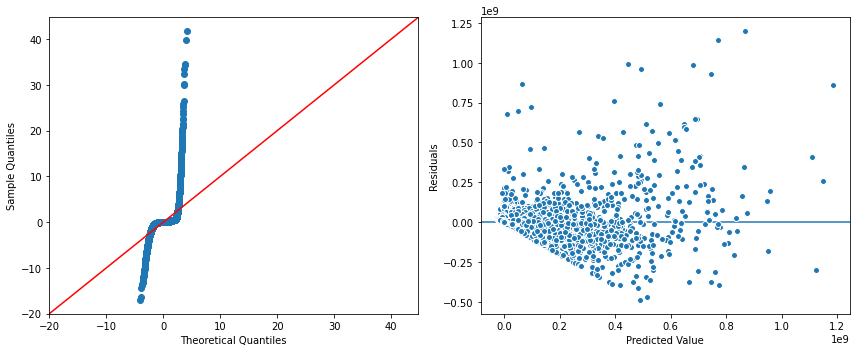

In [846]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

In [847]:
# Getting train & test data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
y_hat_test = result.predict(X_test_df)

print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.752
Testing R^2: 0.739


# The Assumptions of Linear Regression:
- The 4 Assumptions of a Linear Regression are:
 - Linearity: That the input features have a linear relationship with the target.
 - Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
 - Normality: The model's residuals are approximately normally distributed.
 - Homoscedasticity: The model residuals have equal variance across all predictions.

In [848]:
def evaluate_ols(result,X_train_df, y_train, show_summary=True):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    try:
        display(result.summary())
    except:
        pass
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     4311.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:11:48   Log-Likelihood:            -9.2728e+05
No. Observations:               49878   AIC:                         1.855e+06
Df Residuals:                   49842   BIC:                         1.855e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult                 -2.142e+07   6.39e+06     -3.355      0.001   -3.39e+07   -8.91e+06
budget                 -2.03e+07   6.28e+06     -3.230      0.001   -3.26e+07   -7.98e+06
popularity            -2.429e+07   6.72e+06     -3.614      0.000   -3.75e+07   -1.11e+07
runtime               -2.141e+07    6.3e+06     -3.400      0.001   -3.38e+07   -9.07e+06
vote_average          -1.982e+07   6.29e+06     -3.154      0.002   -3.21e+07    -7.5e+06
vote_count            -2.806e+07   6.25e+06     -4.489      0.000   -4.03e+07   -1.58e+07
year                  -3.384e+07   6.24e+06     -5.425      0.000   -4.61e+07   -2.16e+07
month                  1.903e+06   3.46e+06      0.550      0.582   -4.88e+06    8.69e+06
day                       1.6319      0.013    129.295      0.000       1.607       1.657
certification_G        2.899e+04   1780.289     16.283      0.000    2.55e+04    3.25e+04
certification_MISSING -7137.1973   4341.320     -1.644      0.100   -1.56e+04    1371.840
certification_NC-17   -3.539e+05   5.15e+04     -6.878      0.000   -4.55e+05   -2.53e+05
certification_NR       2.708e+04    178.756    151.498      0.000    2.67e+04    2.74e+04
certification_PG       9.509e+04   2.48e+04      3.834      0.000    4.65e+04    1.44e+05
certification_PG-13   -7.943e+04   3.69e+04     -2.152      0.031   -1.52e+05   -7085.515
certification_R        1329.5502   1.42e+04      0.094      0.925   -2.65e+04    2.92e+04
belongs_to_collection  1.181e+07   5.92e+05     19.965      0.000    1.07e+07     1.3e+07
Genre_Drama           -2.713e+05   3.02e+05     -0.898      0.369   -8.63e+05    3.21e+05
Genre_Animation        1.957e+06    8.3e+05      2.357      0.018    3.29e+05    3.58e+06
Genre_Adventure        3.088e+06    6.7e+05      4.610      0.000    1.77e+06     4.4e+06
Genre_Romance          3.523e+05   4.21e+05      0.836      0.403   -4.73e+05    1.18e+06
Genre_Mystery         -1.267e+06   6.23e+05     -2.031      0.042   -2.49e+06   -4.45e+04
Genre_Family          -5.957e+05   6.76e+05     -0.881      0.378   -1.92e+06    7.29e+05
Genre_Horror            3.58e+05   4.16e+05      0.860      0.390   -4.58e+05    1.17e+06
Genre_Thriller        -1.329e+06   3.92e+05     -3.391      0.001    -2.1e+06   -5.61e+05
Genre_Science Fiction -5.091e+06   6.18e+05     -8.235      0.000    -6.3e+06   -3.88e+06
Genre_War             -3.999e+06   1.06e+06     -3.757      0.000   -6.08e+06   -1.91e+06
Genre_Fantasy          -7.06e+05    6.7e+05     -1.054      0.292   -2.02e+06    6.06e+05
Genre_Action          -1.477e+06   4.61e+05     -3.201      0.001   -2.38e+06   -5.73e+05
Genre_Comedy          -5.882e+04   3.29e+05     -0.179      0.858   -7.03e+05    5.86e+05
Genre_Crime            -2.95e+06   5.35e+05     -5.511      0.000      -4e+06    -1.9e+06
Genre_History         -

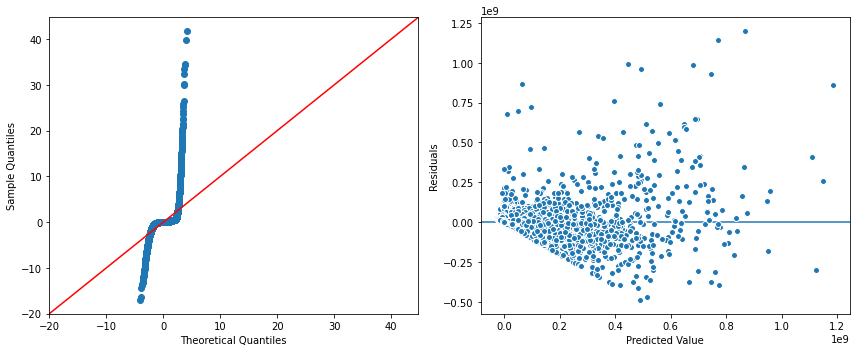

In [849]:
evaluate_ols(result,X_train_df, y_train)

# Improving Our Model:
- Removing some items in data to help improve the Linear Regression. 
- Some movies may not have been released.
- We should probably remove movies with 0 budget and revenue.

In [850]:
## Use .notna() to get True if it belongs to a collection
df_test['belongs_to_collection'] = df_test['belongs_to_collection'].notna()

In [851]:
df_test

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genre_list
0,tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.523,2000-09-29,12854953.0,99.0,In the Mood for Love,8.100,1950.0,PG,Drama
1,tt0120467,0.0,False,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",3.205,2002-04-26,14904.0,87.0,Vulgar,5.400,42.0,R,Drama
2,tt0120630,0.0,True,45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",48.662,2000-06-21,224834564.0,84.0,Chicken Run,6.725,4101.0,G,Animation
3,tt0120753,0.0,False,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",8.136,2000-02-09,105983.0,122.0,The Million Dollar Hotel,5.915,254.0,R,Drama
4,tt0120755,0.0,True,125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",37.711,2000-05-24,546388105.0,123.0,Mission: Impossible II,6.107,5441.0,PG-13,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66500,tt9863642,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}]",4.046,2022-08-30,0.0,84.0,Deceitful Tendencies,0.000,0.0,NaN,Thriller
66501,tt9883832,0.0,False,0.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",16.242,2022-09-15,0.0,135.0,Moonage Daydream,0.000,0.0,PG-13,Documentary
66502,tt9893158,0.0,False,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",2.897,2022-03-13,0.0,96.0,Clowning,8.000,1.0,NaN,Crime
66503,tt9893160,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",9.493,2022-08-12,0.0,89.0,No Way Out,4.250,4.0,NaN,Thriller


In [852]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df_test[f"Genre_{genre}"] = df_test['genres'].str.contains(genre,regex=False)    


## Drop original genre cols
df_test = df_test.drop(columns=['imdb_id', 'genres','genre_list'])


#### Fixing Certification
## Checking Certification values
df_test['certification'].value_counts(dropna=False)
# fix extra space certs
df_test['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df_test['certification'] = df_test['certification'].replace(repl_cert)
df_test['certification'].value_counts(dropna=False)


#### Converting year to sep features
## split release date into 3 columns
new_cols = ['year','month','day']
df_test[new_cols] = df_test['release_date'].str.split('-',expand=True)
df_test[new_cols] = df_test[new_cols].astype(float)

## drop original feature
df_test = df_test.drop(columns=['release_date'])
df_test

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,...,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,year,month,day
0,0.0,False,150000.0,21.523,12854953.0,99.0,In the Mood for Love,8.100,1950.0,PG,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
1,0.0,False,120000.0,3.205,14904.0,87.0,Vulgar,5.400,42.0,R,...,False,True,False,False,False,False,False,2002.0,4.0,26.0
2,0.0,True,45000000.0,48.662,224834564.0,84.0,Chicken Run,6.725,4101.0,G,...,True,False,False,False,False,False,False,2000.0,6.0,21.0
3,0.0,False,8000000.0,8.136,105983.0,122.0,The Million Dollar Hotel,5.915,254.0,R,...,False,False,False,False,False,False,False,2000.0,2.0,9.0
4,0.0,True,125000000.0,37.711,546388105.0,123.0,Mission: Impossible II,6.107,5441.0,PG-13,...,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66500,0.0,False,0.0,4.046,0.0,84.0,Deceitful Tendencies,0.000,0.0,NaN,...,False,False,False,False,False,False,False,2022.0,8.0,30.0
66501,0.0,False,0.0,16.242,0.0,135.0,Moonage Daydream,0.000,0.0,PG-13,...,False,False,False,True,True,False,False,2022.0,9.0,15.0
66502,0.0,False,0.0,2.897,0.0,96.0,Clowning,8.000,1.0,NaN,...,False,True,False,False,False,False,False,2022.0,3.0,13.0
66503,0.0,False,0.0,9.493,0.0,89.0,No Way Out,4.250,4.0,NaN,...,False,True,False,False,False,False,False,2022.0,8.0,12.0


New Filtering - Make sure to only keep:
1. Status=Released.
2. Budget >0
3. Revenue >0

In [853]:
#loading file in df2
df_2 = pd.read_csv(FOLDER+ file_list[6])
df_2

,Unnamed: 0,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,4.0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,1950.0,PG
1,11.0,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R
2,13.0,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.725,4101.0,G
3,16.0,tt0120753,0.0,NaN,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.915,254.0,R
4,17.0,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.107,5441.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66521,NaN,tt9863642,0.0,/61tkYBhLElKr4YLncl5n5NQnyBR.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",https://www.maverickentertainment.cc/movies/de...,1018644.0,en,...,0.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Trapped in a web of deception.,Deceitful Tendencies,0.0,0.000,0.0,NaN
66522,NaN,tt9883832,0.0,/zM3xzRdSshKz6zBZQG0NLyGs2gf.jpg,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",https://neonrated.com/films/bowie-moonage-dayd...,957457.0,en,...,0.0,135.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Bowie.,Moonage Daydream,0.0,0.000,0.0,PG-13
66523,NaN,tt9893158,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955.0,en,...,0.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Warm nights... Feels like death in the sand du...,Clowning,0.0,8.000,1.0,NaN
66524,NaN,tt9893160,0.0,/jX5XGqJUTzvpta2RjcX6pMZqxk5.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,606303.0,en,...,0.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Find what you love and let it kill you.,No Way Out,0.0,4.250,4.0,NaN


In [854]:
#adding status to df test
df_test['status'] = df_2['status']
df_test.head()

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,...,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,year,month,day,status
0,0.0,False,150000.0,21.523,12854953.0,99.0,In the Mood for Love,8.100,1950.0,PG,...,False,False,False,False,False,False,2000.0,9.0,29.0,Released
1,0.0,False,120000.0,3.205,14904.0,87.0,Vulgar,5.400,42.0,R,...,True,False,False,False,False,False,2002.0,4.0,26.0,Released
2,0.0,True,45000000.0,48.662,224834564.0,84.0,Chicken Run,6.725,4101.0,G,...,False,False,False,False,False,False,2000.0,6.0,21.0,Released
3,0.0,False,8000000.0,8.136,105983.0,122.0,The Million Dollar Hotel,5.915,254.0,R,...,False,False,False,False,False,False,2000.0,2.0,9.0,Released
4,0.0,True,125000000.0,37.711,546388105.0,123.0,Mission: Impossible II,6.107,5441.0,PG-13,...,False,False,False,False,False,False,2000.0,5.0,24.0,Released


In [855]:
df_test = df_test.loc[df_test['status'] == 'Released']
df_test = df_test.drop(columns=['status'])
df_test.head()

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,...,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,year,month,day
0,0.0,False,150000.0,21.523,12854953.0,99.0,In the Mood for Love,8.100,1950.0,PG,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
1,0.0,False,120000.0,3.205,14904.0,87.0,Vulgar,5.400,42.0,R,...,False,True,False,False,False,False,False,2002.0,4.0,26.0
2,0.0,True,45000000.0,48.662,224834564.0,84.0,Chicken Run,6.725,4101.0,G,...,True,False,False,False,False,False,False,2000.0,6.0,21.0
3,0.0,False,8000000.0,8.136,105983.0,122.0,The Million Dollar Hotel,5.915,254.0,R,...,False,False,False,False,False,False,False,2000.0,2.0,9.0
4,0.0,True,125000000.0,37.711,546388105.0,123.0,Mission: Impossible II,6.107,5441.0,PG-13,...,False,False,False,False,False,False,False,2000.0,5.0,24.0


In [856]:
df_test = df_test[(df_test['budget']>0) & (df_test['revenue']>0)]
df_test.head(2)

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,...,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,year,month,day
0,0.0,False,150000.0,21.523,12854953.0,99.0,In the Mood for Love,8.1,1950.0,PG,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
1,0.0,False,120000.0,3.205,14904.0,87.0,Vulgar,5.4,42.0,R,...,False,True,False,False,False,False,False,2002.0,4.0,26.0


In [857]:
df_2['production_companies']

0        [{'id': 539, 'logo_path': None, 'name': 'Block...
1        [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...
2        [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...
3        [{'id': 1490, 'logo_path': None, 'name': 'Kint...
4        [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...
                               ...                        
66521                                                   []
66522    [{'id': 48626, 'logo_path': None, 'name': 'BMG...
66523    [{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...
66524    [{'id': 13238, 'logo_path': '/kDNZz8imH866Mezx...
66525                                                   []
Name: production_companies, Length: 66526, dtype: object

In [858]:
#spreading string apart
test_2 = df_2['production_companies'].str.split(r"\'name\'\:.?\'(\w*.*?)\'", expand=True)
test_2['prod_companies'] = test_2[5]

In [859]:
#getting top 50 production companies
prod_companies = test_2['prod_companies'].explode() 
prod_companies.value_counts().head(49)

CNC                                      68
Relativity Media                         41
Warner Bros. Pictures                    40
StudioCanal                              39
ARTE                                     39
RAI Cinema                               37
ZDF                                      33
France 3 Cinéma                          31
Film i Väst                              31
Ciné+                                    30
Focus Features                           30
SVT                                      30
MiC                                      29
01 Distribution                          28
Film4 Productions                        27
Lionsgate                                26
dentsu                                   26
TF1 Films Production                     25
Working Title Films                      25
Amazon Studios                           24
Wild Bunch                               23
Shudder                                  22
Eurimages                       

In [860]:
#putting into a list
common_companies = sorted(prod_companies.value_counts().head(50).index)
len(common_companies)
common_companies

['01 Distribution',
 'ARD',
 'ARTE',
 'Amazon Studios',
 'Artémis Productions',
 'Atresmedia',
 'Blumhouse Productions',
 'Bron Studios',
 'CJ Entertainment',
 'CNC',
 'Canal+',
 'Canal+ España',
 'Ciné+',
 'CinéCinéma',
 'Dimension Films',
 'Dune Entertainment',
 'Epsilon Motion Pictures',
 'Eurimages',
 'EuropaCorp',
 'Film i Väst',
 'Film4 Productions',
 'FilmNation Entertainment',
 'Focus Features',
 'France 3 Cinéma',
 'Globo Filmes',
 'Kreo Films FZ',
 'Lionsgate',
 'Lipsync Productions',
 'M6 Films',
 'Metrol Technology',
 'MiC',
 'Nippon Television Network Corporation',
 'Pathé',
 'Perfect World Pictures',
 'RAI Cinema',
 'Relativity Media',
 'SCOPE Pictures',
 'STX Entertainment',
 'SVT',
 'Shudder',
 'StudioCanal',
 'TF1 Films Production',
 'TSG Entertainment',
 'Touchstone Pictures',
 'UK Film Council',
 'Warner Bros. Pictures',
 'Wild Bunch',
 'Working Title Films',
 'ZDF',
 'dentsu']

In [861]:
#adding production_companies to main df
df_test['production_companies'] = prod_companies
df_test

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,...,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,year,month,day,production_companies
0,0.0,False,150000.0,21.523,12854953.0,99.0,In the Mood for Love,8.100,1950.0,PG,...,False,False,False,False,False,False,2000.0,9.0,29.0,Orly Films
1,0.0,False,120000.0,3.205,14904.0,87.0,Vulgar,5.400,42.0,R,...,True,False,False,False,False,False,2002.0,4.0,26.0,Shongo Filmworks Ltd.
2,0.0,True,45000000.0,48.662,224834564.0,84.0,Chicken Run,6.725,4101.0,G,...,False,False,False,False,False,False,2000.0,6.0,21.0,DreamWorks Animation
3,0.0,False,8000000.0,8.136,105983.0,122.0,The Million Dollar Hotel,5.915,254.0,R,...,False,False,False,False,False,False,2000.0,2.0,9.0,None
4,0.0,True,125000000.0,37.711,546388105.0,123.0,Mission: Impossible II,6.107,5441.0,PG-13,...,False,False,False,False,False,False,2000.0,5.0,24.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66433,0.0,False,90000000.0,3764.786,160000000.0,105.0,DC League of Super-Pets,7.641,402.0,PG,...,False,False,False,False,False,False,2022.0,7.0,27.0,Entertainment One
66461,0.0,True,15354648.0,10.310,29646564.0,174.0,Vikram,6.946,37.0,NaN,...,False,False,False,False,False,False,2022.0,6.0,2.0,None
66464,0.0,False,60000000.0,79.713,2876000.0,108.0,Three Thousand Years of Longing,6.773,66.0,R,...,False,False,False,False,False,False,2022.0,8.0,24.0,None
66468,0.0,False,7900000.0,8.064,3900000.0,154.0,Rocketry: The Nambi Effect,7.607,14.0,NaN,...,False,True,False,False,False,False,2022.0,7.0,1.0,None


In [862]:
## manually ohe top 20 companies
for company in common_companies:
    df_test[f"ProdComp_{company}"] = df_test['production_companies'].str.contains(company, regex=False)

In [863]:
# Dropping title and production_companies columns
drop_for_model = ['title', 'production_companies']
df_test = df_test.drop(columns=drop_for_model)
df_test

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Drama,...,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TSG Entertainment,ProdComp_Touchstone Pictures,ProdComp_UK Film Council,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_Working Title Films,ProdComp_ZDF,ProdComp_dentsu
0,0.0,False,150000.0,21.523,12854953.0,99.0,8.100,1950.0,PG,True,...,False,False,False,False,False,False,False,False,False,False
1,0.0,False,120000.0,3.205,14904.0,87.0,5.400,42.0,R,True,...,False,False,False,False,False,False,False,False,False,False
2,0.0,True,45000000.0,48.662,224834564.0,84.0,6.725,4101.0,G,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,False,8000000.0,8.136,105983.0,122.0,5.915,254.0,R,True,...,None,None,None,None,None,None,None,None,None,None
4,0.0,True,125000000.0,37.711,546388105.0,123.0,6.107,5441.0,PG-13,False,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66433,0.0,False,90000000.0,3764.786,160000000.0,105.0,7.641,402.0,PG,False,...,False,False,False,False,False,False,False,False,False,False
66461,0.0,True,15354648.0,10.310,29646564.0,174.0,6.946,37.0,NaN,False,...,None,None,None,None,None,None,None,None,None,None
66464,0.0,False,60000000.0,79.713,2876000.0,108.0,6.773,66.0,R,True,...,None,None,None,None,None,None,None,None,None,None
66468,0.0,False,7900000.0,8.064,3900000.0,154.0,7.607,14.0,NaN,True,...,None,None,None,None,None,None,None,None,None,None


In [864]:
# remove movies prior to 2000
df_test = df_test.loc[ df_test['year']>=2000]
df_test

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Drama,...,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TSG Entertainment,ProdComp_Touchstone Pictures,ProdComp_UK Film Council,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_Working Title Films,ProdComp_ZDF,ProdComp_dentsu
0,0.0,False,150000.0,21.523,12854953.0,99.0,8.100,1950.0,PG,True,...,False,False,False,False,False,False,False,False,False,False
1,0.0,False,120000.0,3.205,14904.0,87.0,5.400,42.0,R,True,...,False,False,False,False,False,False,False,False,False,False
2,0.0,True,45000000.0,48.662,224834564.0,84.0,6.725,4101.0,G,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,False,8000000.0,8.136,105983.0,122.0,5.915,254.0,R,True,...,None,None,None,None,None,None,None,None,None,None
4,0.0,True,125000000.0,37.711,546388105.0,123.0,6.107,5441.0,PG-13,False,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66433,0.0,False,90000000.0,3764.786,160000000.0,105.0,7.641,402.0,PG,False,...,False,False,False,False,False,False,False,False,False,False
66461,0.0,True,15354648.0,10.310,29646564.0,174.0,6.946,37.0,NaN,False,...,None,None,None,None,None,None,None,None,None,None
66464,0.0,False,60000000.0,79.713,2876000.0,108.0,6.773,66.0,R,True,...,None,None,None,None,None,None,None,None,None,None
66468,0.0,False,7900000.0,8.064,3900000.0,154.0,7.607,14.0,NaN,True,...,None,None,None,None,None,None,None,None,None,None


In [865]:
# Make copy of input df
df_3 = df_test.copy()
df_3

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Drama,...,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TSG Entertainment,ProdComp_Touchstone Pictures,ProdComp_UK Film Council,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_Working Title Films,ProdComp_ZDF,ProdComp_dentsu
0,0.0,False,150000.0,21.523,12854953.0,99.0,8.100,1950.0,PG,True,...,False,False,False,False,False,False,False,False,False,False
1,0.0,False,120000.0,3.205,14904.0,87.0,5.400,42.0,R,True,...,False,False,False,False,False,False,False,False,False,False
2,0.0,True,45000000.0,48.662,224834564.0,84.0,6.725,4101.0,G,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,False,8000000.0,8.136,105983.0,122.0,5.915,254.0,R,True,...,None,None,None,None,None,None,None,None,None,None
4,0.0,True,125000000.0,37.711,546388105.0,123.0,6.107,5441.0,PG-13,False,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66433,0.0,False,90000000.0,3764.786,160000000.0,105.0,7.641,402.0,PG,False,...,False,False,False,False,False,False,False,False,False,False
66461,0.0,True,15354648.0,10.310,29646564.0,174.0,6.946,37.0,NaN,False,...,None,None,None,None,None,None,None,None,None,None
66464,0.0,False,60000000.0,79.713,2876000.0,108.0,6.773,66.0,R,True,...,None,None,None,None,None,None,None,None,None,None
66468,0.0,False,7900000.0,8.064,3900000.0,154.0,7.607,14.0,NaN,True,...,None,None,None,None,None,None,None,None,None,None


In [866]:
# Get list of ALL prod_comp columns to see how many are sig
#to change ffrom object to bool
comp_cols = [c for c in df_test.columns if c.startswith("ProdComp")]
df_test[comp_cols] = df_test[comp_cols].astype('bool')

C:\Users\jonny\AppData\Local\Temp\ipykernel_24776\3232487781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[comp_cols] = df_test[comp_cols].astype('bool')


In [867]:
#checking
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 66479
Data columns (total 81 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   adult                                           5241 non-null   float64
 1   belongs_to_collection                           5241 non-null   bool   
 2   budget                                          5241 non-null   float64
 3   popularity                                      5241 non-null   float64
 4   revenue                                         5241 non-null   float64
 5   runtime                                         5241 non-null   float64
 6   vote_average                                    5241 non-null   float64
 7   vote_count                                      5241 non-null   float64
 8   certification                                   4038 non-null   object 
 9   Genre_Drama                             

# Checking for Linearity:

In [868]:
## concatenating training data into plot_df
plot_df = pd.concat([X_train_df,y_train],axis=1)
plot_df

,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,certification_G,...,Genre_Action,Genre_Comedy,Genre_Crime,Genre_History,Genre_Documentary,Genre_Music,Genre_Western,Genre_TV Movie,const,revenue
16804,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.108,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3422,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64371,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.265,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59861,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6265,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,80000000.0,47.057,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,343397247.0
54886,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [869]:
## save plot_cols list to show (dropping genre from plot_df from pair_plot)
genre_cols = [c for c in df_test.columns if c.startswith('Genre')]
plot_cols = plot_df.drop(columns=['revenue',*genre_cols]).columns
len(plot_cols)

18

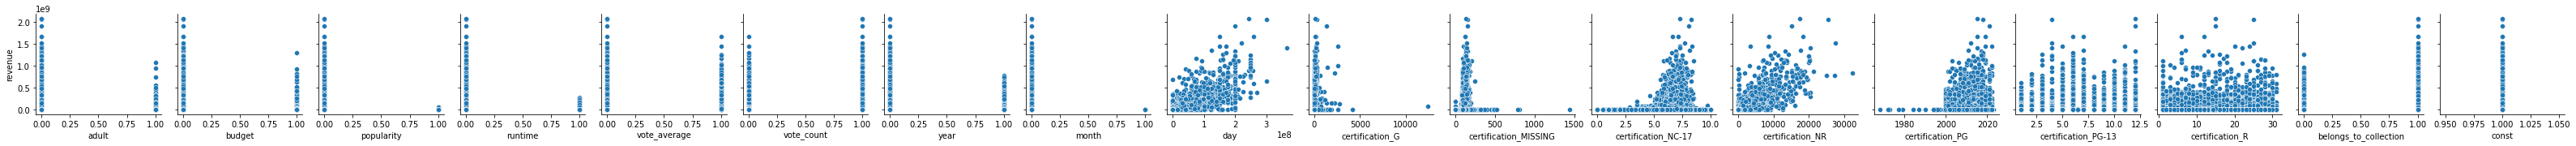

In [870]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols)

# Removing Outliers:
- Using Z-Score Rule

In [871]:
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [872]:
## save a dictionary of the T/F outlier index for each important float feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue', 'adult', 'budget', 'vote_count']

outliers = {}
for col in outlier_cols:
    outliers_col = find_outliers(df[col])
    outliers[col] = outliers_col

- 151 outliers found in runtime using Z-Scores.
- 210 outliers found in popularity using Z-Scores.
- 717 outliers found in revenue using Z-Scores.
- 106 outliers found in adult using Z-Scores.
- 1171 outliers found in budget using Z-Scores.
- 924 outliers found in vote_count using Z-Scores.


In [873]:
df_test = df_test[~outliers_col]

C:\Users\jonny\AppData\Local\Temp\ipykernel_24776\681697609.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = df_test[~outliers_col]


In [874]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4347 entries, 0 to 66468
Data columns (total 81 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   adult                                           4347 non-null   float64
 1   belongs_to_collection                           4347 non-null   bool   
 2   budget                                          4347 non-null   float64
 3   popularity                                      4347 non-null   float64
 4   revenue                                         4347 non-null   float64
 5   runtime                                         4347 non-null   float64
 6   vote_average                                    4347 non-null   float64
 7   vote_count                                      4347 non-null   float64
 8   certification                                   3190 non-null   object 
 9   Genre_Drama                             

# Checking features - based on p-values:

In [875]:
# get pvalues from before model result
pvals = result.pvalues 
# Check for p-values that are >.05
pvals[ pvals>.05]

month                    0.582265
certification_MISSING    0.100179
certification_R          0.925478
Genre_Drama              0.369142
Genre_Romance            0.403004
Genre_Family             0.378275
Genre_Horror             0.389555
Genre_Fantasy            0.291748
Genre_Comedy             0.858050
Genre_Music              0.351932
Genre_TV Movie           0.633312
dtype: float64

In [876]:
## Get list of ALL genre columns to see how many are sig
genre_cols = [c for c in df_test.columns if c.startswith("Genre")]
genre_cols

['Genre_Drama',
 'Genre_Animation',
 'Genre_Adventure',
 'Genre_Romance',
 'Genre_Mystery',
 'Genre_Family',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_Science Fiction',
 'Genre_War',
 'Genre_Fantasy',
 'Genre_Action',
 'Genre_Comedy',
 'Genre_Crime',
 'Genre_History',
 'Genre_Documentary',
 'Genre_Music',
 'Genre_Western',
 'Genre_TV Movie']

In [877]:
## save just genre pvalues
genre_pvals = pvals[genre_cols]
## calc what % are insig?
genre_pvals.sum()/len(genre_pvals)

0.19852998417823894

In [878]:
pvals[genre_cols]

Genre_Drama              3.691417e-01
Genre_Animation          1.843650e-02
Genre_Adventure          4.045524e-06
Genre_Romance            4.030043e-01
Genre_Mystery            4.221907e-02
Genre_Family             3.782747e-01
Genre_Horror             3.895546e-01
Genre_Thriller           6.977227e-04
Genre_Science Fiction    1.835520e-16
Genre_War                1.724710e-04
Genre_Fantasy            2.917481e-01
Genre_Action             1.370595e-03
Genre_Comedy             8.580504e-01
Genre_Crime              3.593476e-08
Genre_History            2.635415e-04
Genre_Documentary        3.382394e-02
Genre_Music              3.519318e-01
Genre_Western            6.436806e-05
Genre_TV Movie           6.333117e-01
dtype: float64

# 2nd Train Test Split:

In [879]:
#make x features and y revenue target
X = df_test.drop(columns=['revenue']).copy()
y = df_test['revenue'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Drama,Genre_Animation,...,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TSG Entertainment,ProdComp_Touchstone Pictures,ProdComp_UK Film Council,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_Working Title Films,ProdComp_ZDF,ProdComp_dentsu
3122,0.0,False,100000000.0,25.360,136.0,6.796,986.0,PG-13,False,False,...,False,False,False,False,False,False,False,False,False,False
6789,0.0,False,5000000.0,18.980,94.0,6.579,519.0,R,False,False,...,False,False,False,False,False,False,False,False,False,False
51266,0.0,False,2243662.0,22.803,114.0,7.700,56.0,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
823,0.0,False,10000000.0,18.425,77.0,6.530,234.0,PG,False,True,...,False,False,False,False,False,False,False,False,False,False
11986,0.0,False,250.0,0.600,82.0,10.000,1.0,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False


In [880]:
#making column selector for objects
cat_select_2 = make_column_selector(dtype_include='object')
cat_col_2 = cat_select(X_train)
cat_col_2

['certification']

In [881]:
#column selector for bool
bool_select_2 = make_column_selector(dtype_include='bool')
ready_ohe_cols_2 = bool_select(X_train)
ready_ohe_cols_2

['belongs_to_collection',
 'Genre_Drama',
 'Genre_Animation',
 'Genre_Adventure',
 'Genre_Romance',
 'Genre_Mystery',
 'Genre_Family',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_Science Fiction',
 'Genre_War',
 'Genre_Fantasy',
 'Genre_Action',
 'Genre_Comedy',
 'Genre_Crime',
 'Genre_History',
 'Genre_Documentary',
 'Genre_Music',
 'Genre_Western',
 'Genre_TV Movie',
 'ProdComp_01 Distribution',
 'ProdComp_ARD',
 'ProdComp_ARTE',
 'ProdComp_Amazon Studios',
 'ProdComp_Artémis Productions',
 'ProdComp_Atresmedia',
 'ProdComp_Blumhouse Productions',
 'ProdComp_Bron Studios',
 'ProdComp_CJ Entertainment',
 'ProdComp_CNC',
 'ProdComp_Canal+',
 'ProdComp_Canal+ España',
 'ProdComp_Ciné+',
 'ProdComp_CinéCinéma',
 'ProdComp_Dimension Films',
 'ProdComp_Dune Entertainment',
 'ProdComp_Epsilon Motion Pictures',
 'ProdComp_Eurimages',
 'ProdComp_EuropaCorp',
 'ProdComp_Film i Väst',
 'ProdComp_Film4 Productions',
 'ProdComp_FilmNation Entertainment',
 'ProdComp_Focus Features',
 'ProdComp_Fra

In [882]:
#column selector for numric
num_select_2 = make_column_selector(dtype_include='number')
num_cols_2 = num_select(X_train)
num_cols_2

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [883]:
#convert ohe_col to int
X_train[ready_ohe_cols_2] = X_train[ready_ohe_cols_2].astype(int)
X_test[ready_ohe_cols_2] = X_test[ready_ohe_cols_2].astype(int)

In [884]:
#make pipeline for cat & num
cat_pipe_2 = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe_2 = make_pipeline(SimpleImputer(strategy='mean'))

preprocessor_2 = make_column_transformer((cat_pipe,cat_col), (num_pipe, num_cols),
                                      ('passthrough', 
                                       ready_ohe_cols), remainder= 'passthrough')
preprocessor_2

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'r...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Drama',
                                  'Genre_Animation', 'Genre_Adventure',
                                  'Genre_Romance', 'Genre_Mystery',
                                  'Genre_Family', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_Science Fiction',
                                  'Genre_War', 'Genre_Fantasy', 'Genre_Action',
                                  'Genre_Comedy', 'Genre_Crime',
                                  'Genre_History', 'Genre_Documentary',
                                  'Genre_Music', 'Genre_Western',
                                  'Genre_TV Movie'])])

In [885]:
#fit col transformer
preprocessor_2.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'r...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Drama',
                                  'Genre_Animation', 'Genre_Adventure',
                                  'Genre_Romance', 'Genre_Mystery',
                                  'Genre_Family', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_Science Fiction',
                                  'Genre_War', 'Genre_Fantasy', 'Genre_Action',
                                  'Genre_Comedy', 'Genre_Crime',
                                  'Genre_History', 'Genre_Documentary',
                                  'Genre_Music', 'Genre_Western',
                                  'Genre_TV Movie'])])

In [886]:
#finding the cat pipeline in col transformer
preprocessor_2.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [887]:
#Using list-slicing to find the encoder 
cat_features_2 = preprocessor_2.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_col_2)

In [888]:
# Creating the empty list
final_features_2 = [*num_cols_2,*cat_features_2,*ready_ohe_cols_2]
len(final_features_2)

86

In [889]:
#looking at the feature columns
final_features_2

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day',
 'certification_G',
 'certification_MISSING',
 'certification_NC-17',
 'certification_NR',
 'certification_PG',
 'certification_PG-13',
 'certification_R',
 'belongs_to_collection',
 'Genre_Drama',
 'Genre_Animation',
 'Genre_Adventure',
 'Genre_Romance',
 'Genre_Mystery',
 'Genre_Family',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_Science Fiction',
 'Genre_War',
 'Genre_Fantasy',
 'Genre_Action',
 'Genre_Comedy',
 'Genre_Crime',
 'Genre_History',
 'Genre_Documentary',
 'Genre_Music',
 'Genre_Western',
 'Genre_TV Movie',
 'ProdComp_01 Distribution',
 'ProdComp_ARD',
 'ProdComp_ARTE',
 'ProdComp_Amazon Studios',
 'ProdComp_Artémis Productions',
 'ProdComp_Atresmedia',
 'ProdComp_Blumhouse Productions',
 'ProdComp_Bron Studios',
 'ProdComp_CJ Entertainment',
 'ProdComp_CNC',
 'ProdComp_Canal+',
 'ProdComp_Canal+ España',
 'ProdComp_Ciné+',
 'ProdComp_CinéCinéma',
 'ProdComp_Dimensi

In [890]:
#getting shape of X-train
preprocessor_2.transform(X_train).shape

(3260, 86)

In [891]:
X_train_tf_2 = pd.DataFrame(preprocessor_2.transform(X_train), 
                          columns=final_features_2, index=X_train.index)
X_train_tf_2.head()

,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,certification_G,...,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TSG Entertainment,ProdComp_Touchstone Pictures,ProdComp_UK Film Council,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_Working Title Films,ProdComp_ZDF,ProdComp_dentsu
3122,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100000000.0,25.360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6789,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5000000.0,18.980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51266,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2243662.0,22.803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
823,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10000000.0,18.425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11986,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [892]:
X_test_tf_2 = pd.DataFrame(preprocessor_2.transform(X_test), columns=final_features_2,
                         index=X_test.index)
X_test_tf_2.head()

,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,certification_G,...,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TSG Entertainment,ProdComp_Touchstone Pictures,ProdComp_UK Film Council,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_Working Title Films,ProdComp_ZDF,ProdComp_dentsu
29935,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11000000.0,13.727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
947,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8000000.0,11.473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35712,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,9.345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47378,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20000000.0,18.966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36685,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3800000.0,5.552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [893]:
X_train_df_2 = sm.add_constant(X_train_tf_2, prepend=False, has_constant='add')
X_test_df_2 = sm.add_constant(X_test_tf_2, prepend=False, has_constant='add')
display(X_train_df_2.head(2), X_test_df_2.head(2))

,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,certification_G,...,ProdComp_TF1 Films Production,ProdComp_TSG Entertainment,ProdComp_Touchstone Pictures,ProdComp_UK Film Council,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_Working Title Films,ProdComp_ZDF,ProdComp_dentsu,const
3122,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100000000.0,25.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6789,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5000000.0,18.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,certification_G,...,ProdComp_TF1 Films Production,ProdComp_TSG Entertainment,ProdComp_Touchstone Pictures,ProdComp_UK Film Council,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_Working Title Films,ProdComp_ZDF,ProdComp_dentsu,const
29935,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11000000.0,13.727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
947,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8000000.0,11.473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# FInal Model:
- Evaluation 

In [894]:
# instantiate an OLS model 2 WITH the new training data.
model_2 = sm.OLS(y_train, X_train_df_2)

In [895]:
#fitting model 2 and viewing summary
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     51.52
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:11:54   Log-Likelihood:                -62311.
No. Observations:                3260   AIC:                         1.248e+05
Df Residuals:                    3190   BIC:                         1.252e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
adult                                           4.173e+07   4.01e+07      1.041      0.298   -3.69e+07     1.2e+08
budget                                          1.776e+07   4.03e+07      0.440      0.660   -6.13e+07    9.68e+07
popularity                                      1.173e+07   4.18e+07      0.280      0.779   -7.03e+07    9.38e+07
runtime                                         1.284e+07   4.03e+07      0.318      0.750   -6.63e+07     9.2e+07
vote_average                                    2.041e+07   4.01e+07      0.510      0.610   -5.81e+07    9.89e+07
vote_count                                       1.39e+07   3.99e+07      0.348      0.728   -6.44e+07    9.22e+07
year                                            1.232e+06      4e+07      0.031      0.975   -7.71e+07    7.96e+07
month                                              0.0123      0.199      0.062      0.951      -0.378       0.402
day                                                1.1701      0.044     26.424      0.000       1.083       1.257
certification_G                                 7.927e+04   7256.488     10.924      0.000     6.5e+04    9.35e+04
certification_MISSING                           1.889e+05   4.81e+04      3.927      0.000    9.46e+04    2.83e+05
certification_NC-17                             3.051e+05   7.96e+05      0.383      0.701   -1.25e+06    1.87e+06
certification_NR                                2.323e+04   1252.903     18.543      0.000    2.08e+04    2.57e+04
certification_PG                               -8.173e+04   1.59e+05     -0.514      0.607   -3.93e+05     2.3e+05
certification_PG-13                             1.667e+05   2.52e+05      0.662      0.508   -3.27e+05     6.6e+05
certification_R                                 3.151e+04   1.01e+05      0.312      0.755   -1.67e+05     2.3e+05
belongs_to_collection                           3.028e+07   2.43e+06     12.450      0.000    2.55e+07    3.51e+07
Genre_Drama                                    -1.794e+06    2.2e+06     -0.816      0.414    -6.1e+06    2.52e+06
Genre_Animation                                 2.529e+06   4.75e+06      0.533      0.594   -6.78e+06    1.18e+07
Genre_Adventure                                -3.209e+06   3.08e+06     -1.043      0.297   -9.24e+06    2.82e+06
Genre_Romance                                   4.879e+05   2.42e+06      0.201      0.840   -4.26e+06    5.24e+06
Genre_Mystery                                   3.942e+06   3.41e+06      1.157      0.247   -2.74e+06    1.06e+07
Genre_Family                                   -1.651e+06   4.38e+06     -0.377      0.706   -1.02e+07    6.94e+06
Genre_Horror                                    1.632e+06   3.25e+06      0.503      0.615   

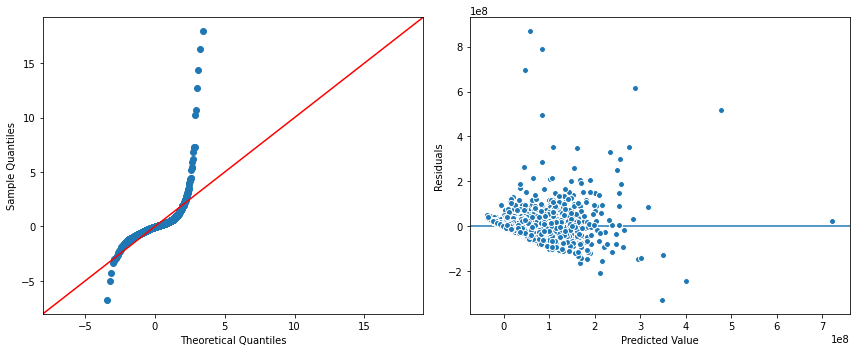

In [896]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result_2,X_train_df_2, y_train)

In [898]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train_2 = result_2.predict(X_train_df_2)
print(f'Training R^2: {r2_score(y_train, y_hat_train_2):.3f}')

## Get test data performance
y_hat_test_2 = result_2.predict(X_test_df_2)
print(f'Testing R^2: {r2_score(y_test, y_hat_test_2):.3f}')

Training R^2: 0.527
Testing R^2: 0.523


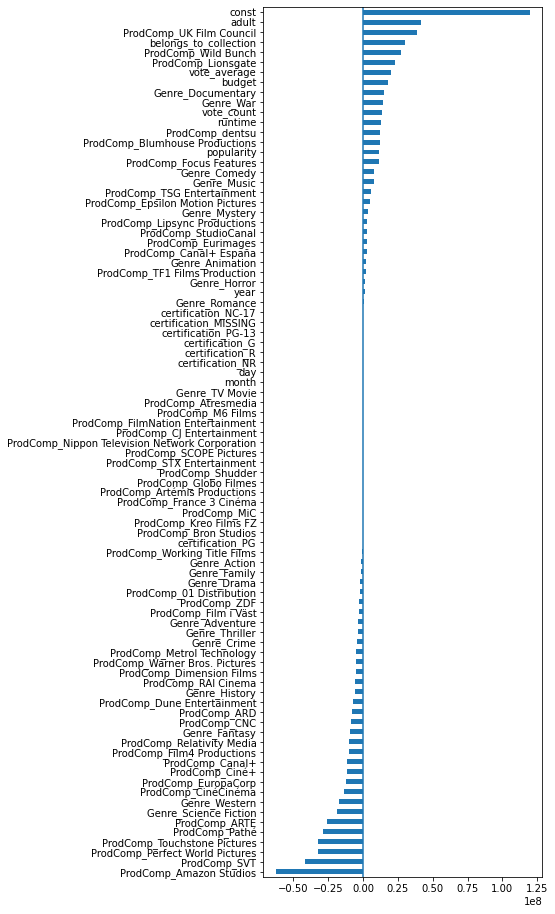

In [899]:
# Visualize Coefficients
plt.figure(figsize=(5,16))
ax=result_2.params.sort_values().plot(kind='barh')
ax.axvline()

# Compare to Alternative Regressors:
- Comparing to Random Forest Regressor 

In [900]:
#comparing to model to Random Forest Regressor
#X_train_df_3, y_train, X_test_df_3, y_test = get_train_test_split(df_test)

reg = RandomForestRegressor(verbose=1,random_state=42)
reg.fit(X_train_df_2, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


RandomForestRegressor(random_state=42, verbose=1)

In [901]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train_3 = reg.predict(X_train_df_2)
print(f'Training R^2: {r2_score(y_train, y_hat_train_3):.3f}')

## Get test data performance
y_hat_test_3 = reg.predict(X_test_df_2)
print(f'Testing R^2: {r2_score(y_test, y_hat_test_3):.3f}')

Training R^2: 0.918
Testing R^2: 0.545


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


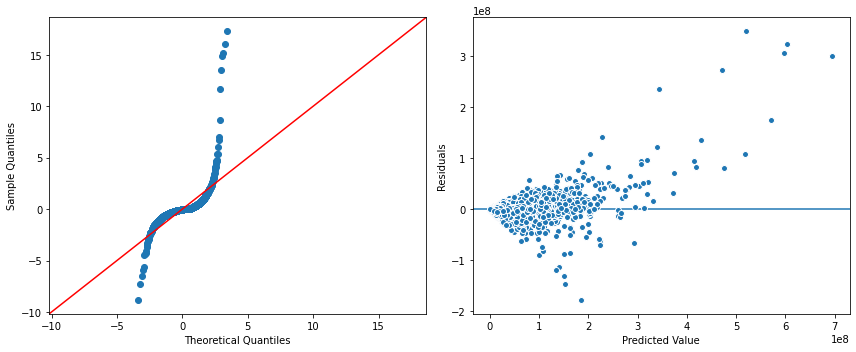

In [902]:
#evaluating reg model using QQ plot
evaluate_ols(reg, X_train_df_2, y_train)

<AxesSubplot:>

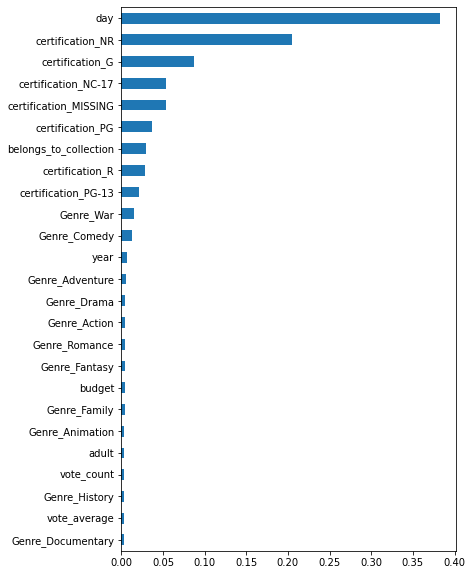

In [903]:
#looking at important columns for reg model using hbar plot
importances = pd.Series(reg.feature_importances_, index=X_train_df_2.columns)
importances.sort_values().tail(25).plot(kind='barh',figsize=(6,10))